In [1]:
"""
Created by Joseph Edradan
Github: https://github.com/josephedradan

Date created: 4/6/2021

Purpose:
    Test Stanford's Gensim word vector visualization of various word vectors example using gensim on a glove dataset
    
Details:

Description:

Notes:

IMPORTANT NOTES:

Explanation:

Reference:
    Convert glove format to word2vec
        Notes:
        Reference:
            https://radimrehurek.com/gensim/scripts/glove2word2vec.html
    
    Gensim word vector visualization of various word vectors
        Notes:
            * Superior Stanford example compared to gensim exmaple
            and this is what this notebook is primarily based on.
            
        Reference:
            https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html
    
"""

"\nCreated by Joseph Edradan\nGithub: https://github.com/josephedradan\n\nDate created: 4/6/2021\n\nPurpose:\n    Test Stanford's Gensim word vector visualization of various word vectors example using gensim on a glove dataset\n    \nDetails:\n\nDescription:\n\nNotes:\n\nIMPORTANT NOTES:\n\nExplanation:\n\nReference:\n    Convert glove format to word2vec\n        Notes:\n        Reference:\n            https://radimrehurek.com/gensim/scripts/glove2word2vec.html\n    \n    Gensim word vector visualization of various word vectors\n        Notes:\n            * Superior Stanford example compared to gensim exmaple\n            and this is what this notebook is primarily based on.\n            \n        Reference:\n            https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html\n    \n"

In [2]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import numpy as np

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from handler_glove import (FILE_DATASET_840B_300D, 
                           FILE_DATASET_6B_50D, 
                           FILE_DATASET_840B_300D_gensim_word2vec,
                           convert_glove_dataset_to_word2vec_format)



In [3]:
# Convert glove dataset to gensim supported word2vec
convert_glove_dataset_to_word2vec_format(FILE_DATASET_840B_300D,FILE_DATASET_840B_300D_gensim_word2vec)

word2vec of H:/Datasets\GloVe\glove.840B.300d.txt already exists!


In [4]:
# Create genshim word2vec of word2vec form glove dataset
model = KeyedVectors.load_word2vec_format(FILE_DATASET_840B_300D_gensim_word2vec)  # 10m 5s LOAD TIME

In [5]:
model.most_similar('obama')

C:\Users\Joseph\anaconda3\lib\site-packages\gensim\models\keyedvectors.py:772: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


[('barack', 0.9002273678779602),
 ('mccain', 0.8256935477256775),
 ('clinton', 0.7826938033103943),
 ('hillary', 0.7601866126060486),
 ('palin', 0.732517421245575),
 ('romney', 0.7319680452346802),
 ('biden', 0.714806318283081),
 ('Barack', 0.6800318360328674),
 ('obamas', 0.6754997372627258),
 ('gop', 0.6750357747077942)]

In [6]:
model.most_similar('banana')

[('bananas', 0.8091707229614258),
 ('pineapple', 0.7421035766601562),
 ('coconut', 0.7215186357498169),
 ('strawberry', 0.7120675444602966),
 ('mango', 0.6991901397705078),
 ('carrot', 0.6791643500328064),
 ('fruit', 0.67148357629776),
 ('pumpkin', 0.6642457842826843),
 ('peanut', 0.6637848615646362),
 ('blueberry', 0.6517722010612488)]

In [7]:
model.most_similar(negative='banana')

[('5/10/108', 0.6092562079429626),
 ('cock.ring', 0.5837782621383667),
 ('CamelKarma', 0.575423002243042),
 ('http://tristatesradio.com', 0.574588418006897),
 ('03003007700', 0.5717657208442688),
 ('LyricsHall.com', 0.5697330236434937),
 ('News-ID', 0.5690463185310364),
 ('UPCListElement', 0.5669848918914795),
 ('FINDING_TREATMENT_17', 0.5616267919540405),
 ('FILE.FileSize', 0.5579511523246765)]

In [8]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7752


In [9]:
def analogy(x1, x2, y1):
    """
    Finds the pattern between the 3 given words.
    
    Notes:
        It is not always right!
    
    """
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

# Analogy

In [10]:
# Demographic 

analogy('japan', 'japanese', 'australia')  

'australian'

In [11]:
# Beers?

analogy('australia', 'beer', 'france')

'beers'

In [12]:
# Lastname, Lastname, Lastname, Fisrtname?
# Dem, Dem, Repub, Repub?? (Same person)

analogy('obama', 'clinton', 'reagan')  

'ronald'

In [13]:
analogy('tall', 'tallest', 'long')

'longest'

In [14]:
analogy('good', 'fantastic', 'bad')

'awful'

In [15]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))  # Wow

cereal


In [16]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            # words is a list of random words
            # Get n amount of random words 
#             words = np.random.choice(list(model.vocab.keys()), sample)

            # Get n amount of random words (Gensim 4.0.0)
            words = np.random.choice(list(model.key_to_index), sample)  # Get n amount of random words 

        else:
            # words is all the words (DANGEROUS)
            words = [ word for word in model.vocab ]
    
    # Get the vectors of the words in an np array
    word_vectors = np.array([model[w] for w in words])
    
    # Get the Principal Component Analaysis data (Select 2 PCAs that represent the data in the best way)
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    # Plot teh PCA
    plt.figure(figsize=(16,16))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

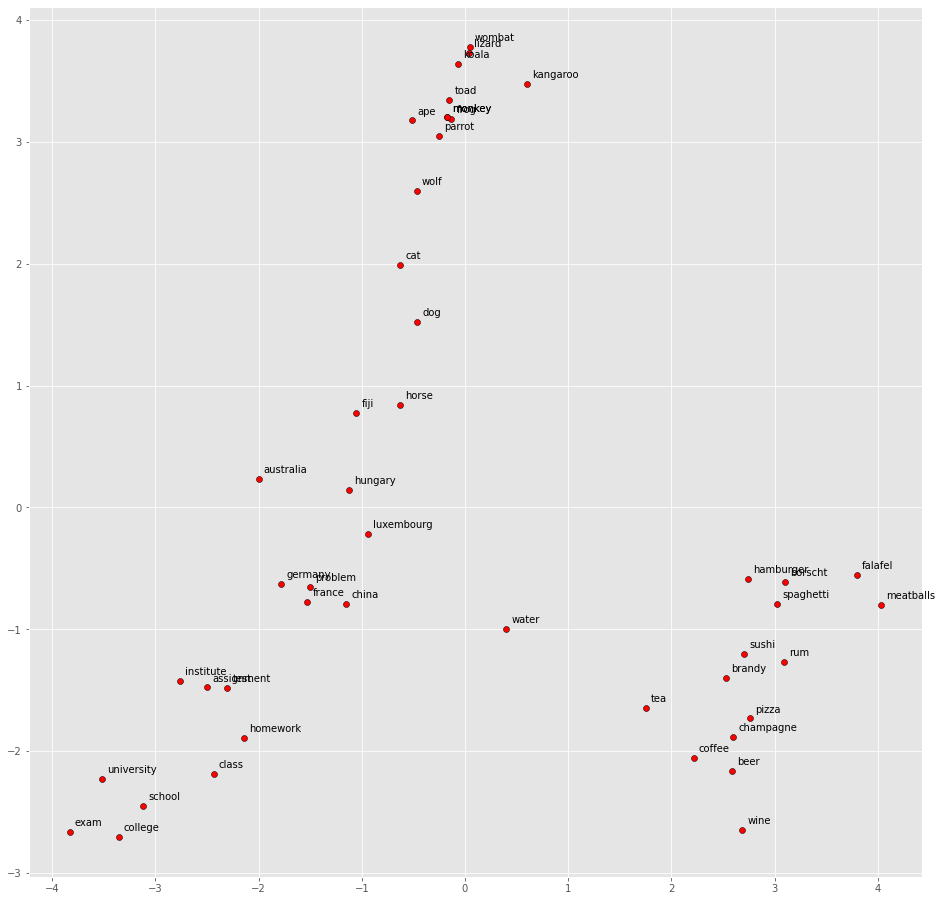

In [17]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

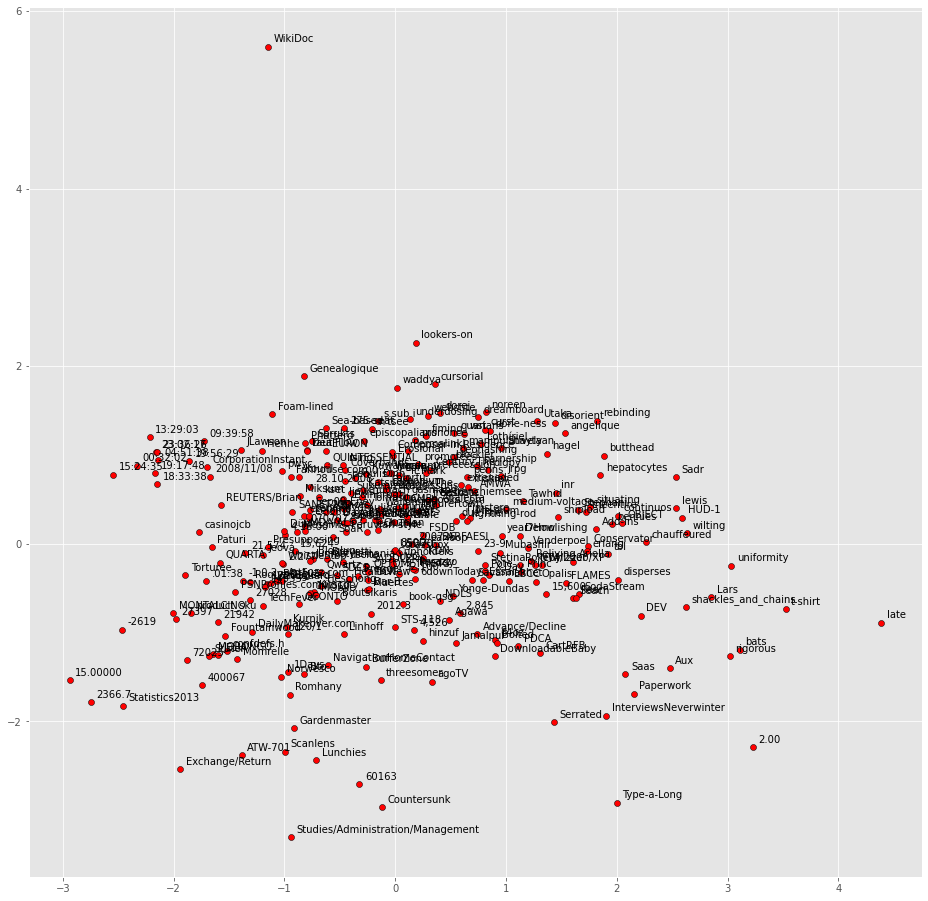

In [18]:
display_pca_scatterplot(model, sample=300)